In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import torch 
import torchvision 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms,models
from torchvision.transforms import v2
from pathlib import Path
import os 
import random
import torch.nn.functional as F
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay)
import PIL
from PIL import Image
torchvision.disable_beta_transforms_warning()

In [2]:
image_path = Path("/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch")
train_dir = image_path / "train"
val_dir = image_path / "validate"
test_dir = image_path / "test"

train_dir,val_dir,test_dir

(PosixPath('/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/train'),
 PosixPath('/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/validate'),
 PosixPath('/kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/test'))

In [3]:
random.seed(42)

# creating path list for all images
image_path_list = list(image_path.glob("**/*.jpg"))

# taking randome 4 images 
random_image_path = random.sample(image_path_list,4)

In [4]:
img_transforms = v2.Compose([
    transforms.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Normalize((0.5,),(0.5,))
])

In [5]:
from torchvision import datasets
train_data = datasets.ImageFolder(root= train_dir, #target folder defined above
                                  transform= img_transforms,
                                 )

test_data = datasets.ImageFolder(root= test_dir,
                                 transform= img_transforms)

val_data = datasets.ImageFolder(root= val_dir,
                                transform= img_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}\nVal data:\n {val_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 57072
    Root location: /kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/train
    StandardTransform
Transform: Compose(
                 ToTensor()
                 ToDtype(scale=False)
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 7134
    Root location: /kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/test
    StandardTransform
Transform: Compose(
                 ToTensor()
                 ToDtype(scale=False)
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )
Val data:
 Dataset ImageFolder
    Number of datapoints: 7134
    Root location: /kaggle/input/nepali-handwritten-augmented/nhcd_pytorch/validate
    StandardTransform
Transform: Compose(
                 ToTensor()
                 ToDtype(scale=False)
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )


In [6]:
target_names = train_data.classes
print(f"Targets name:\n{target_names}\n")

target_to_index = train_data.class_to_idx
print(f"Targets to index:\n{target_to_index}\n")

index_to_target = {value:key for key,value in target_to_index.items()}
print(f"Index to targets:\n{index_to_target}")

Targets name:
['अ', 'अं', 'अः', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'क्ष', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'ज्ञ', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'त्र', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']

Targets to index:
{'अ': 0, 'अं': 1, 'अः': 2, 'आ': 3, 'इ': 4, 'ई': 5, 'उ': 6, 'ऊ': 7, 'ए': 8, 'ऐ': 9, 'ओ': 10, 'औ': 11, 'क': 12, 'क्ष': 13, 'ख': 14, 'ग': 15, 'घ': 16, 'ङ': 17, 'च': 18, 'छ': 19, 'ज': 20, 'ज्ञ': 21, 'झ': 22, 'ञ': 23, 'ट': 24, 'ठ': 25, 'ड': 26, 'ढ': 27, 'ण': 28, 'त': 29, 'त्र': 30, 'थ': 31, 'द': 32, 'ध': 33, 'न': 34, 'प': 35, 'फ': 36, 'ब': 37, 'भ': 38, 'म': 39, 'य': 40, 'र': 41, 'ल': 42, 'व': 43, 'श': 44, 'ष': 45, 'स': 46, 'ह': 47, '०': 48, '१': 49, '२': 50, '३': 51, '४': 52, '५': 53, '६': 54, '७': 55, '८': 56, '९': 57}

Index to targets:
{0: 'अ', 1: 'अं', 2: 'अः', 3: 'आ', 4: 'इ', 5: 'ई', 6: 'उ', 7: 'ऊ', 8: 'ए', 9: 'ऐ', 10: 'ओ', 11: 'औ', 12: 'क', 13: 'क्ष', 14: 'ख'

In [7]:
train_dataloader = DataLoader(train_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=False)
val_dataloader = DataLoader(val_data,batch_size=64,shuffle=True)

train_dataloader,test_dataloader,val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb89eee6920>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb89eee61a0>)

In [8]:
# convering the dataloader object into iterable and fetching the first batch

test_images_batches, test_target_batches = next(iter(test_dataloader)) 
test_images_batches.shape,len(test_images_batches)

(torch.Size([64, 3, 28, 28]), 64)

The label of image is: अ


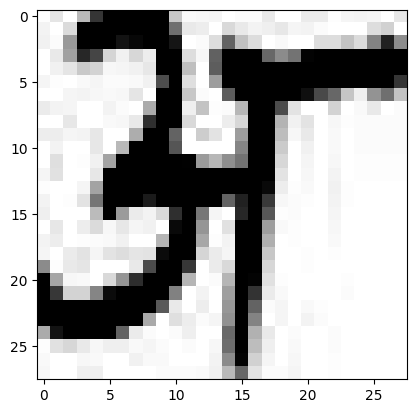

In [9]:
first_img = test_images_batches[1]
first_img_target = int(test_target_batches[0])

#since matplotlib works with H,W,C sequence for images, we will remove the first dimension
first_img_numpy = first_img.numpy()
first_img_numpy = np.transpose(first_img_numpy,(1,2,0))
print(f"The label of image is: {index_to_target[first_img_target]}")
plt.imshow(first_img_numpy);

In [10]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"currently using : {device}")

currently using : cuda:0


In [11]:
model = models.resnet101(pretrained=True).to(device)
for param in model.parameters():
    param.requires_grad = True

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 163MB/s]  


In [12]:
num_classes = 58
model.fc = nn.Linear(model.fc.in_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [13]:
%%time

patience = 5  # number of epochs with no improvement after which training
#will be stopped

early_stop_counter = 0
best_test_loss = float('inf')
epochs = 4

train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    model.train()
    training_loss = 0.0
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
    

    average_train_loss = training_loss / len(train_dataloader)
    train_loss_list.append(average_train_loss)

    # Validation
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    average_test_loss = test_loss / len(test_dataloader)
    test_loss_list.append(average_test_loss)
    
    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {average_train_loss} | Test Loss: {average_test_loss}")
    
    # Check for early stopping
    if test_loss < best_test_loss:
      best_test_loss = test_loss
      early_stop_counter = 0
    else:
      early_stop_counter +=1
    if early_stop_counter >= patience:
        print(f'Early stopping after {epoch + 1} epochs with no improvement in validation loss.')
        break



Epoch 1/4, Training Loss: 1.0421253397826924 | Test Loss: 0.26433515739959795
Epoch 2/4, Training Loss: 0.20325983411135495 | Test Loss: 0.125485107667503
Epoch 3/4, Training Loss: 0.08948782972277314 | Test Loss: 0.09820574928744463
Epoch 4/4, Training Loss: 0.05308038417632053 | Test Loss: 0.08749608577272738
CPU times: user 6min 10s, sys: 18.3 s, total: 6min 28s
Wall time: 11min 33s


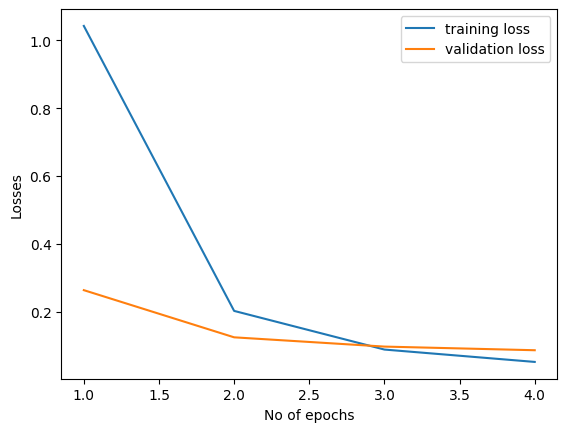

In [14]:
plt.plot([i for i in range(1,epochs+1)],train_loss_list,label = "training loss");
plt.plot([i for i in range(1,epochs+1)],test_loss_list,label="validation loss");
plt.xlabel("No of epochs")
plt.ylabel("Losses")
plt.legend();

In [15]:
from sklearn.metrics import accuracy_score, classification_report

num_classes=58

# Evaluation
model.eval()  
all_predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, all_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

class_names = [f"Class {index_to_target[i]}" for i in range(num_classes)]
print("Classification Report:")
print(classification_report(true_labels, all_predictions, target_names=class_names))

Test Accuracy: 97.52%
Classification Report:
              precision    recall  f1-score   support

     Class अ       0.95      0.97      0.96       123
    Class अं       1.00      1.00      1.00       123
    Class अः       0.98      0.99      0.99       123
     Class आ       1.00      0.98      0.99       123
     Class इ       0.98      0.98      0.98       123
     Class ई       0.99      0.99      0.99       123
     Class उ       0.98      0.97      0.97       123
     Class ऊ       0.97      0.99      0.98       123
     Class ए       1.00      0.95      0.97       123
     Class ऐ       0.98      1.00      0.99       123
     Class ओ       0.98      0.98      0.98       123
     Class औ       0.98      0.98      0.98       123
     Class क       0.99      0.98      0.98       123
   Class क्ष       0.95      1.00      0.98       123
     Class ख       1.00      0.98      0.99       123
     Class ग       0.98      0.98      0.98       123
     Class घ       0.97      0.93   

Index to targets:
{0: 'अ', 1: 'अं', 2: 'अः', 3: 'आ', 4: 'इ', 5: 'ई', 6: 'उ', 7: 'ऊ', 8: 'ए', 9: 'ऐ', 10: 'ओ', 11: 'औ', 12: 'क', 13: 'क्ष', 14: 'ख', 15: 'ग', 16: 'घ', 17: 'ङ', 18: 'च', 19: 'छ', 20: 'ज', 21: 'ज्ञ', 22: 'झ', 23: 'ञ', 24: 'ट', 25: 'ठ', 26: 'ड', 27: 'ढ', 28: 'ण', 29: 'त', 30: 'त्र', 31: 'थ', 32: 'द', 33: 'ध', 34: 'न', 35: 'प', 36: 'फ', 37: 'ब', 38: 'भ', 39: 'म', 40: 'य', 41: 'र', 42: 'ल', 43: 'व', 44: 'श', 45: 'ष', 46: 'स', 47: 'ह', 48: '०', 49: '१', 50: '२', 51: '३', 52: '४', 53: '५', 54: '६', 55: '७', 56: '८', 57: '९'}

Confusion Matrix:


<Figure size 2000x2000 with 0 Axes>

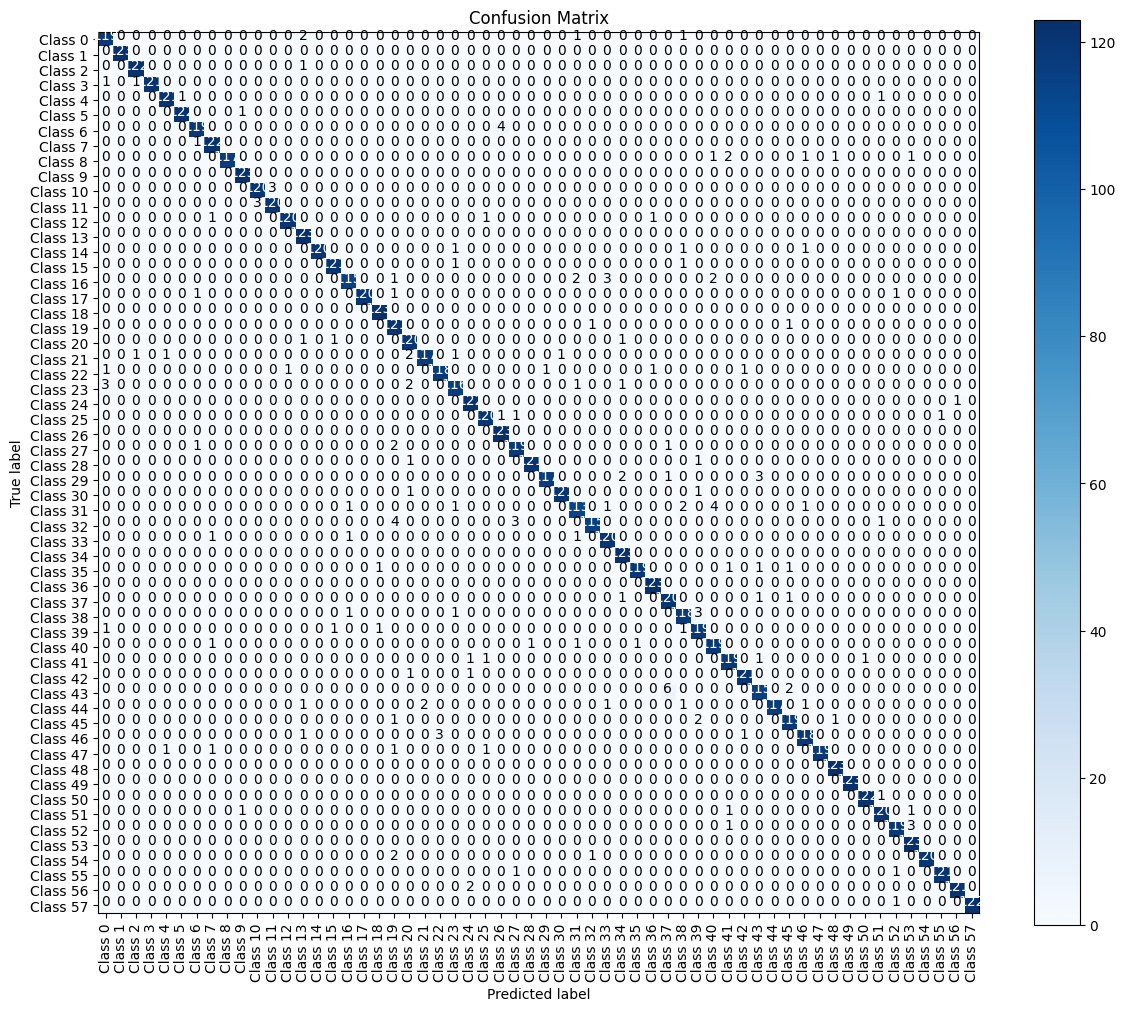

In [16]:

class_names = [f"Class {i}" for i in range(58)]
print("Confusion Matrix:")

plt.figure(figsize=(20, 20))

cm = confusion_matrix(true_labels,all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
import itertools
plt.figure(figsize=(12, 10))

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Display the confusion matrix values in each cell
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("ConfusionMatrix2.png",dpi=300)
plt.show()

In [17]:
path = Path("/kaggle/working/minor_res97.pth")
torch.save(model,path)

In [18]:
path = Path("/kaggle/working/minor_res97_state.pth")
torch.save(model.state_dict(),path)

(28, 28)

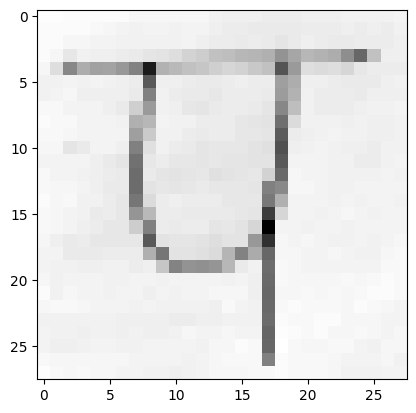

In [19]:
import cv2
org_img = cv2.imread("/kaggle/input/test-data-1/IMG_20240212_165747.jpg")
org_img = cv2.resize(org_img,(28,28),interpolation=cv2.INTER_AREA)

img = cv2.imread("/kaggle/input/test-data-1/IMG_20240212_170329.jpg",
                cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(img,cmap="gray")
img.shape

(28, 28, 3)


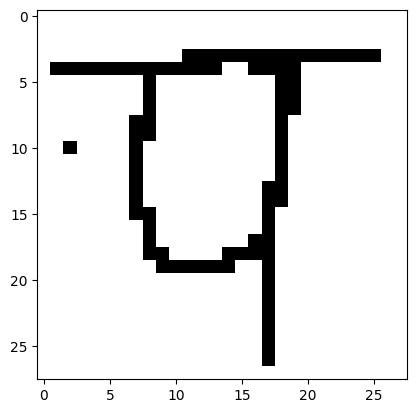

In [20]:
img_bin = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,4)
thresh_rgb = cv2.cvtColor(img_bin,cv2.COLOR_GRAY2BGR)
print(thresh_rgb.shape)
plt.imshow(thresh_rgb,cmap="gray");

(28, 28, 3)

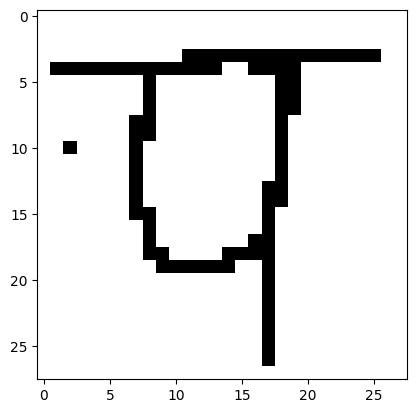

In [21]:
transformed_img = img_transforms(thresh_rgb).unsqueeze(dim=0)
img_numpy = transformed_img.numpy().squeeze()
img_numpy = np.transpose(img_numpy,(1,2,0))
plt.imshow(img_numpy,cmap="gray");
img_numpy.shape

In [22]:
with torch.inference_mode():
    transformed_img = transformed_img.to(device)
    outputs = model(transformed_img)
    _,predicted_index = torch.max(outputs.data,1) #returns max value and index
    probabilities = F.softmax(outputs,1)

max_probab = max(probabilities[0]).item()
print(f"Predicted character is: {index_to_target[int(predicted_index)]} with probability: {(max(probabilities[0])).item():.6f}")


Predicted character is: प with probability: 0.998863


In [23]:
all_probabilities = probabilities.squeeze().tolist()
for i, prob in enumerate(all_probabilities):
    print(f"Class: {index_to_target[i]}, Probability: {prob:.6f}")

Class: अ, Probability: 0.000002
Class: अं, Probability: 0.000000
Class: अः, Probability: 0.000001
Class: आ, Probability: 0.000002
Class: इ, Probability: 0.000001
Class: ई, Probability: 0.000001
Class: उ, Probability: 0.000031
Class: ऊ, Probability: 0.000001
Class: ए, Probability: 0.000009
Class: ऐ, Probability: 0.000004
Class: ओ, Probability: 0.000003
Class: औ, Probability: 0.000002
Class: क, Probability: 0.000002
Class: क्ष, Probability: 0.000001
Class: ख, Probability: 0.000003
Class: ग, Probability: 0.000004
Class: घ, Probability: 0.000055
Class: ङ, Probability: 0.000002
Class: च, Probability: 0.000349
Class: छ, Probability: 0.000003
Class: ज, Probability: 0.000007
Class: ज्ञ, Probability: 0.000000
Class: झ, Probability: 0.000002
Class: ञ, Probability: 0.000002
Class: ट, Probability: 0.000003
Class: ठ, Probability: 0.000002
Class: ड, Probability: 0.000002
Class: ढ, Probability: 0.000001
Class: ण, Probability: 0.000033
Class: त, Probability: 0.000006
Class: त्र, Probability: 0.000009


In [25]:
num_classes=58

# Evaluation
model.eval()  
all_predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, all_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.73%


In [26]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.9 MB/s eta 0:00:00:00:0100:01


In [27]:
import plotly.graph_objs as go
from IPython.display import display


class_names = [f"Class {i}" for i in range(58)]
print("Confusion Matrix:")

cm = confusion_matrix(true_labels, all_predictions)

# Create a Plotly heatmap trace
trace = go.Heatmap(
    x=class_names,
    y=class_names,
    z=cm,
    colorscale='Blues',
)

# Layout
layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted label'),
    yaxis=dict(title='True label'),
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Save the figure as an image
# fig.write_image("confusion_matrix.png")

display(fig);

Confusion Matrix:
